In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a sample dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=5
    #, random_state=1
)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    #, random_state=42
)

In [2]:
from gbor.main import BoostedOrdinal
from sklearn.tree import DecisionTreeRegressor

model = BoostedOrdinal(
    max_iter = 1000, lr_g = 1e-2, lr_theta = 1e-3
    , base_learner = DecisionTreeRegressor(max_depth = 6)
    , n_iter_no_change = 10
    #, reltol = -np.inf
).fit(X_train, y_train)

In [3]:
#model.path['loss_holdout']
model.n_iter

87

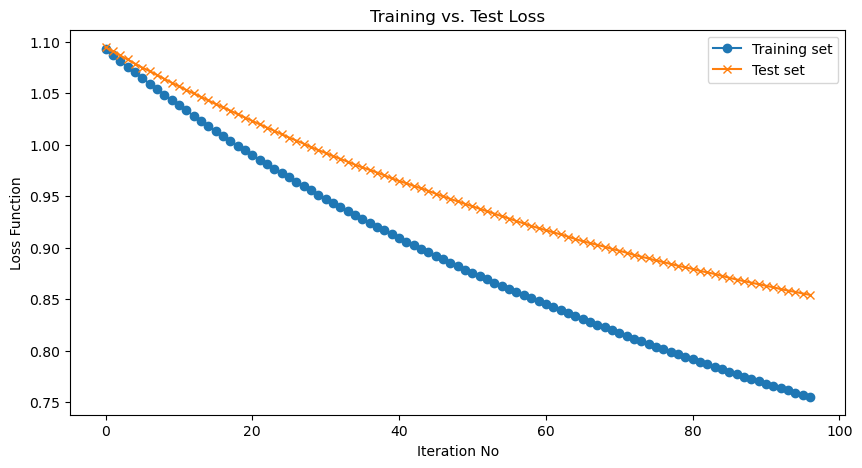

In [5]:
import numpy as np

my_pred_test = model.predict(X_test, y_test, path = True, class_labels = False)
my_pred_train = model.predict(X_train, y_train, path = True, class_labels = False)

loss_train = -np.array([tmp[1] for tmp in my_pred_train]) / X_train.shape[0]
loss_test = -np.array([tmp[1] for tmp in my_pred_test]) / X_test.shape[0]

import matplotlib.pyplot as plt

indices = np.arange(len(loss_train))

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the first array
plt.plot(indices, loss_train, label='Training set', marker='o')

# Plot the second array
plt.plot(indices, loss_test, label='Test set', marker='x')

# Add labels and title
plt.xlabel('Iteration No')
plt.ylabel('Loss Function')
plt.title('Training vs. Test Loss')
plt.legend()

# Show the plot
plt.show()
